In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


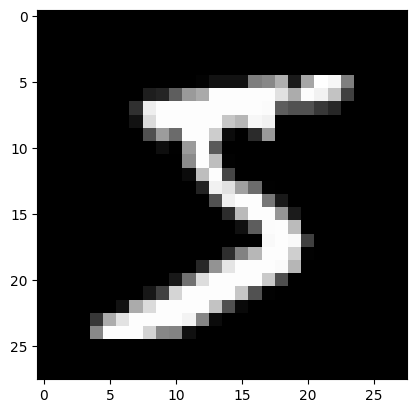

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()


In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train=tf.cast(X_train,tf.bfloat16)
X_test=tf.cast(X_test,tf.bfloat16)

In [8]:
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=bfloat16, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0117798, 0.0708008,
        0.0708008, 0.0708008, 0.494141, 0.535156, 0.6875, 0.102051,
        0.652344, 1, 0.96875, 0.498047, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0.117676, 0.141602, 0.369141, 0.605469,
        0.667969, 0.992188, 0.992188, 0.992188, 0.992188, 0.992188,
        0.882812, 0.675781, 0.992188, 0.949219, 0.765625, 0.251953, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0,

In [9]:
y_train=tf.one_hot(y_train,depth=10)

In [10]:
y_test=tf.one_hot(y_test,depth=10)

In [11]:
train_dataset=tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(128)
val_dataset=tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)

In [12]:
def digit():
    img=tf.keras.Input(shape=(28,28,1))
    flat=tf.keras.layers.Flatten()(img)
    dense1=tf.keras.layers.Dense(28,activation="relu")(flat)
    dense2=tf.keras.layers.Dense(28,activation='relu')(dense1)
    out=tf.keras.layers.Dense(10,activation="softmax")(dense2)

    model=tf.keras.Model(inputs=img,outputs=out)

    return model


In [13]:
model = digit()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 28)                  │          21,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28)                  │             812 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,082 (90.16 KB)

 Trainable params: 23,082 (90.16 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
model.fit(train_dataset,epochs=50,validation_data=val_dataset)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7097 - loss: 0.9884 - val_accuracy: 0.9181 - val_loss: 0.2769
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9283 - loss: 0.2528 - val_accuracy: 0.9352 - val_loss: 0.2137
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9433 - loss: 0.1964 - val_accuracy: 0.9444 - val_loss: 0.1823
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9508 - loss: 0.1660 - val_accuracy: 0.9501 - val_loss: 0.1630
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9567 - loss: 0.1458 - val_accuracy: 0.9537 - val_loss: 0.1504
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9610 - loss: 0.1309 - val_accuracy: 0.9561 - val_loss: 0.1418
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9643 - loss: 0.1193 - val_accuracy: 0.9582 - val_loss: 0.1361
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9665 - loss: 0.1101 - val_accuracy: 0.

In [16]:
layer1=model.get_layer("dense")

In [17]:
weights,bias=layer1.get_weights()

In [18]:
weights=tf.cast(weights,tf.bfloat16).numpy()

In [19]:
print(bin(weights[0][0].view(np.uint16))[2:])

1011110110011101


In [20]:
weights[0][0]

-0.0766602

In [21]:
weights.shape

(784, 28)

In [22]:
def bfloat16_to_binary(x):
    # Get the raw bytes of the bfloat16
    bytes_val = x.tobytes()
    # Convert to integer to get binary representation
    int_val = int.from_bytes(bytes_val, byteorder='little')
    # Format as 16-bit binary string
    return format(int_val, '016b')

for neuron_index in range(weights.shape[1]):
    neuron_weights = weights[:, neuron_index]
    neuron_weights_bin = [bfloat16_to_binary(w) for w in neuron_weights]
    np.savetxt(f"dense3_neuron_{neuron_index}_weights.txt", neuron_weights_bin, fmt="%s")

In [23]:
bias=tf.cast(bias,tf.bfloat16).numpy()

In [24]:
neuron_bias=[bfloat16_to_binary(w) for w in bias]
np.savetxt(f"dense1_neuron_bias.txt", neuron_bias, fmt="%s")

In [25]:
import shutil
import zipfile

In [26]:
test=X_test[0:5]
y=y_test[0:5]

In [27]:
test[0]

<tf.Tensor: shape=(28, 28), dtype=bfloat16, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0.330078, 0.726562, 0.625, 0.59375, 0.235352,
        0.141602, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0.871094, 0.996094, 0.996094, 0.996094,
        0.996094, 0.945312, 0.777344,

In [28]:
test.shape

TensorShape([5, 28, 28])

In [29]:
for i in range(5):
    np.savetxt(f"test.txt",test[i], fmt="%s")


In [30]:
for i in range(5):
    with open("test.txt", "a") as f:  # Open in append mode
        np.savetxt(f, test[i], fmt="%s")  # Save one row at a time
        np.savetxt(f, [y[i]], fmt="%s")  # Save corresponding y[i]


In [31]:
test[0].shape

TensorShape([28, 28])

In [32]:
y

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [33]:
a=model.predict(test[0:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


In [34]:
a.shape

(5, 10)

In [35]:
np.argmax(a,axis=1)

array([7, 2, 1, 0, 4])

In [36]:
test[0]

<tf.Tensor: shape=(28, 28), dtype=bfloat16, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0.330078, 0.726562, 0.625, 0.59375, 0.235352,
        0.141602, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0.871094, 0.996094, 0.996094, 0.996094,
        0.996094, 0.945312, 0.777344,

In [37]:
test[1]

<tf.Tensor: shape=(28, 28), dtype=bfloat16, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.455078, 0.490234, 0.671875, 1, 1,
        0.589844, 0.365234, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.664062, 0.992188, 0.992188,
        0.992188, 0.992188, 0.992188, 0.992188, 0.855469, 0.117676, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0.664062, 0.992188, 0.992188, 0.992188,
        0.835938, 0.558594, 0.691406, 0.992188, 0.992188, 0.478516, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0.204102, 0.980469, 0.992188, 0.824219,
        0.125977, 0.0471191, 0, 0.0235596, 0.808594, 0.992188, 0.550781,
        0, 0, 0, 

In [38]:
test[2]

<tf.Tensor: shape=(28, 28), dtype=bfloat16, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.149414,
        0.996094, 0.427734, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.341797,
        0.988281, 0.322266, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.53125,
        0.945312, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.176758, 0.957031,
        0.589844, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.330078, 0.

In [39]:
test[3]

<tf.Tensor: shape=(28, 28), dtype=bfloat16, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0432129, 0.589844,
        0.992188, 0.792969, 0.121582, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.145508, 0.984375, 0.984375,
        0.992188, 0.419922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0825195, 0.773438, 0.984375,
        0.984375, 0.992188, 0.419922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.431641, 0.746094, 0.984375,
        0.984375, 0.984375, 0.992188, 0.664062, 0.427734, 0.

In [40]:
test[4]

<tf.Tensor: shape=(28, 28), dtype=bfloat16, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.196289, 0.878906, 0, 0, 0, 0, 0,
        0, 0, 0.275391, 0.11377, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.474609, 0.90625, 0, 0, 0, 0, 0,
        0, 0, 0.582031, 0.660156, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0157471, 0.765625, 0.90625, 0, 0, 0,
        0, 0, 0, 0, 0.376953, 0.824219, 0.0432129, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.271484,

In [41]:
y[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [42]:
y[1]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [43]:
y[2]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [44]:
y[3]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [45]:
y[4]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)>